tensorflow version 2.6.0


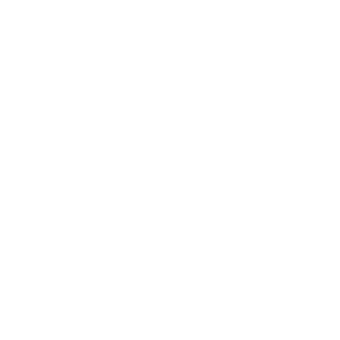

In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import scipy.signal
import soundfile as sp
import librosa
import pandas as pd
import librosa.display
from IPython.display import HTML
import IPython.display as ipd
import matplotlib.animation as animation
from sklearn.decomposition import  PCA,TruncatedSVD,FastICA
from inaSpeechSegmenter import Segmenter
from inaSpeechSegmenter.export_funcs import seg2csv, seg2textgrid
from utils import Preprocessing,Animation
from utils import Visualize
from dataloader import DataLoader
import random
import os
import config
from  pathlib  import Path 
print("tensorflow version" ,tf.__version__)
device = tf.config.list_physical_devices()[-1]

In [2]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 12
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

#We are initializing the experiment being analyzed
exp = config.experiment["NAME"]

In [3]:
pp =  Preprocessing(config.data['OUT_PATH'])

df =  pp.get_files()

# load some test data for demonstration and plot a wireframe
dl = DataLoader(config.data['file_path'],keepdims=True, crop_dims= (128,128) )
dl.load()

500 files read successfully


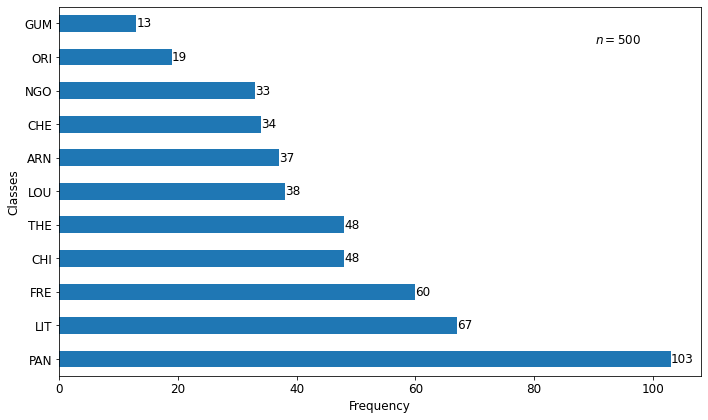

In [4]:
viz =  Visualize(config.figures['figpath'])
viz.show_distribution(df,save=True,filename=f'Data_Distribution_{exp}', figsize=(10,6))

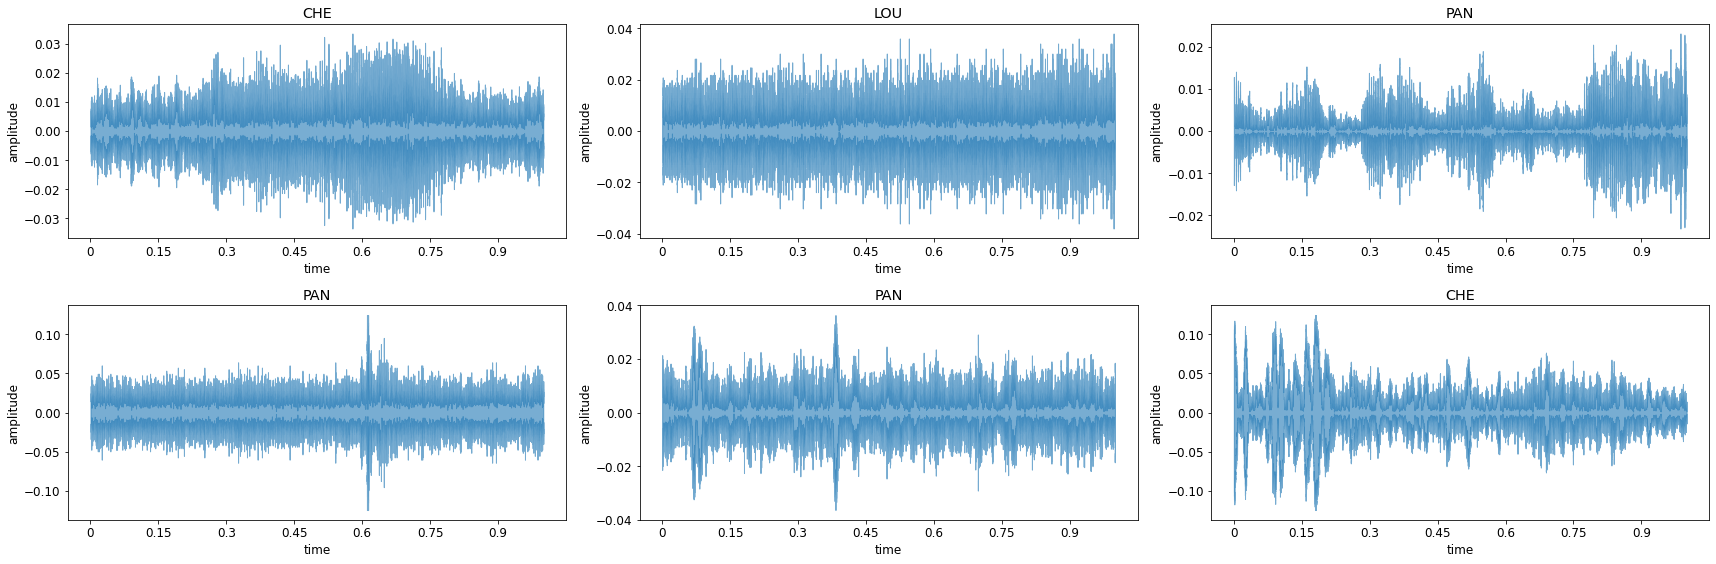

In [16]:
n =  6
idx = np.random.randint(0, dl.X.shape[0], n)
viz.display(dl.X,dl.Z,dl.y,dl.CLASSES,idx,filename=f'Sample_Waveplot_{exp}.png')

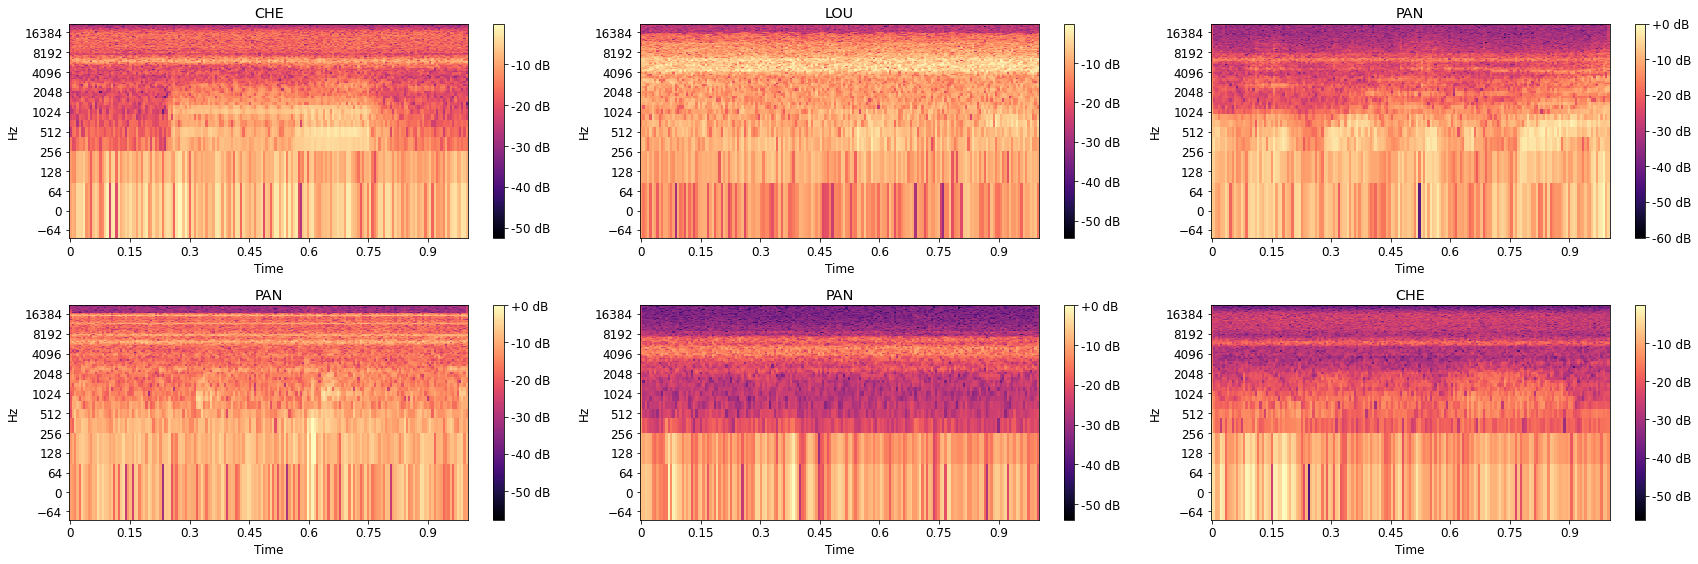

In [17]:
viz.display(dl.X,dl.Z,dl.y,dl.CLASSES,idx, flag=True,filename=f'UnNormalized_Frequency_Spectogram_{exp}.png')

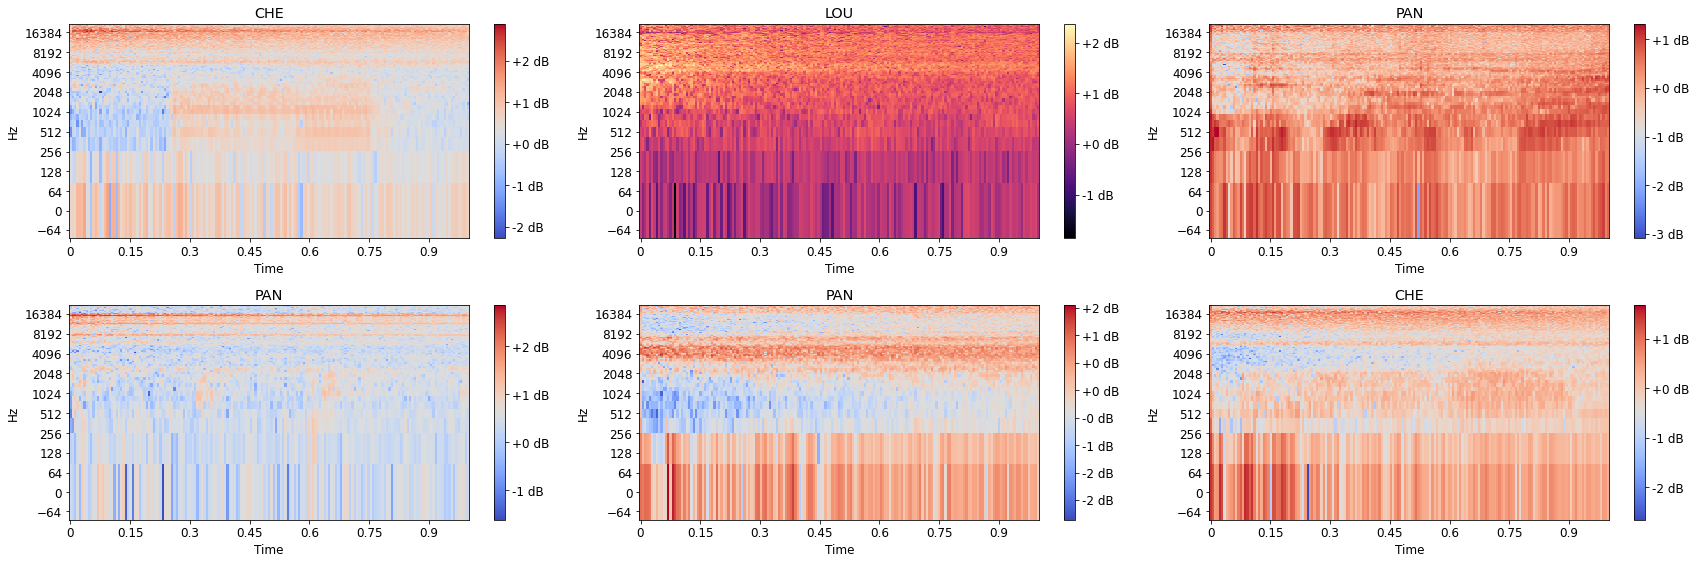

In [18]:
viz.display(dl.X_,dl.Z,dl.y,dl.CLASSES,idx, flag=True, save=True, filename=f'Normalized_Frequency_Spectogram_{exp}.png')

In [20]:
dl.X_.shape

(8075, 129, 173)